# A brief exploratory data analysis with Python
## Exploring Ebay Car Sales Data

This jupyter notebook presents a exploratory analysis of a Kaggle's dataset (Exploring Ebay Car Sales Data) with seven graphs. 
The exploratory analysis employed pandas, seaborn and matplotlib packages. The exploratory analysis is usually required prior to data cleansing to create predictive machine learning models.

In [1]:
# Packages imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_theme()
%matplotlib inline
warnings.filterwarnings('ignore')

Dataset used in the analysis

In [2]:
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

The next graph presents the vehicles distribution based on the year of registration of them. We can verify that 
most of cars where registered around 2000.

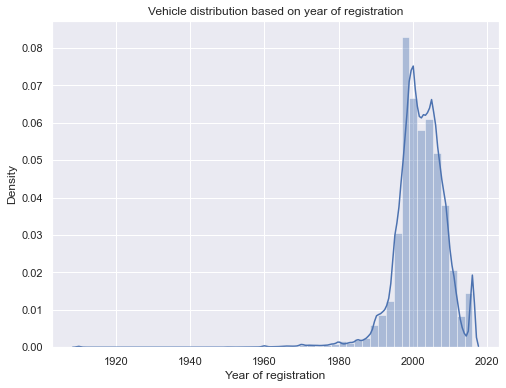

In [3]:
plt.figure(figsize=(8,6))
fig = sns.distplot(df[["yearOfRegistration"]])
fig.set(title = "Vehicle distribution based on year of registration", xlabel="Year of registration", ylabel="Density")
plt.show()

The next plot is formed by boxplots of vehicles types.
The boxplots show the median price, the first and third quartiles prices, the minimum and maximun prices and the outliers.

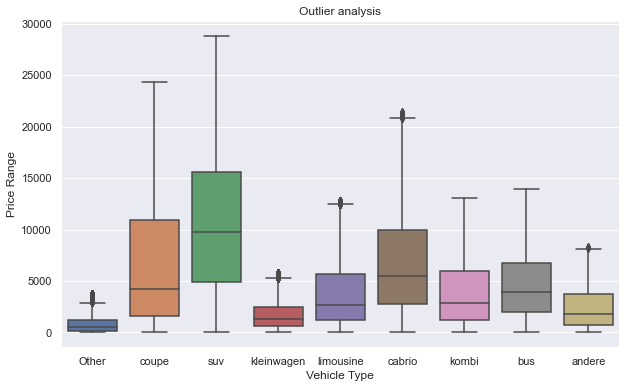

In [4]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x="vehicleType", y="price", data=df)
fig.set(title="Outlier analysis", xlabel="Vehicle Type", ylabel="Price Range")
plt.show()

This bar graph presents the amount of vehicles for each brand presented in the dataset.

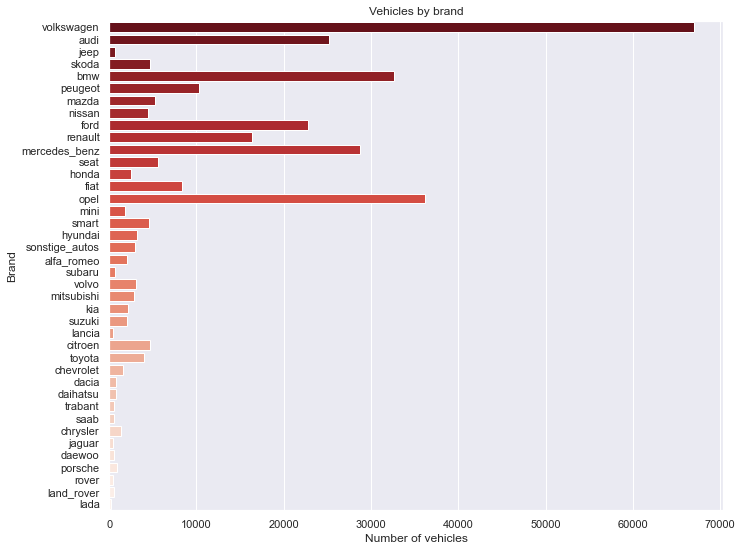

In [5]:
sns.set_theme()
plt.figure(figsize=(11,9))
fig = sns.countplot(y="brand", data=df, palette= "Reds_r")
fig.set(title="Vehicles by brand", xlabel="Number of vehicles", ylabel="Brand")
plt.show()

The following bar graph presents the mean vehicles prices by vehicles types and gearbox.

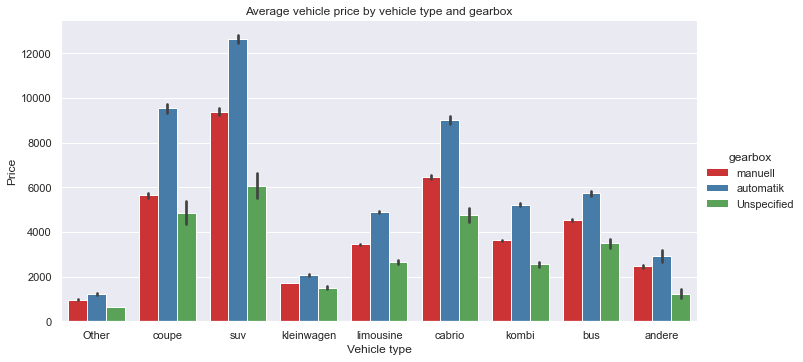

In [6]:
fig = sns.catplot(data=df, kind="bar", x="vehicleType", y="price", hue="gearbox", palette="Set1", height=5, aspect=2)
fig.set(title="Average vehicle price by vehicle type and gearbox", xlabel="Vehicle type", ylabel="Price")
plt.show()

The following bar graph presents the mean vehicles prices by fuels types and gearbox.

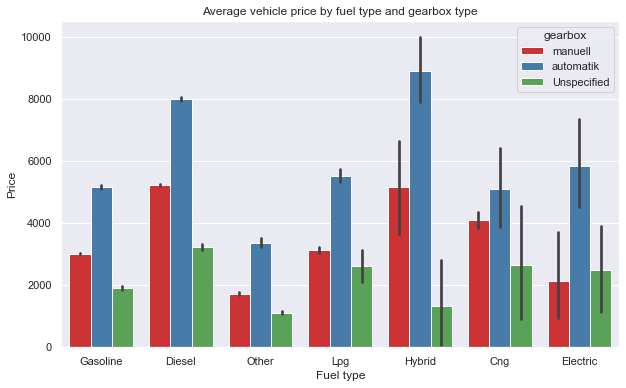

In [7]:
plt.figure(figsize=(10,6))
fig = sns.barplot(data=df, x="fuelType", y="price", hue="gearbox", palette="Set1")
fig.set(title="Average vehicle price by fuel type and gearbox type", xlabel="Fuel type", ylabel="Price")
plt.show()

The next bar graph presents a mean vehicles power by vehicle type and gearbox.

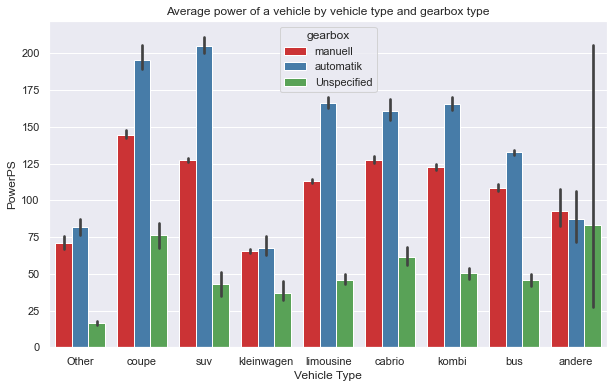

In [8]:
plt.figure(figsize=(10,6))
fig = sns.barplot(data=df, x="vehicleType", y="powerPS", hue="gearbox", palette="Set1")
fig.set(title="Average power of a vehicle by vehicle type and gearbox type", xlabel="Vehicle Type", ylabel="PowerPS")
plt.show()

The next instructions prepare the data to create a heatmap. the idea is to know the vehicles mean prices based on their brand and type.

In [9]:
dfmean = df[["brand","vehicleType", "price"]].groupby(by=["brand","vehicleType"]).mean().astype(int)
dfmean = dfmean.unstack(level=-1, fill_value=0)

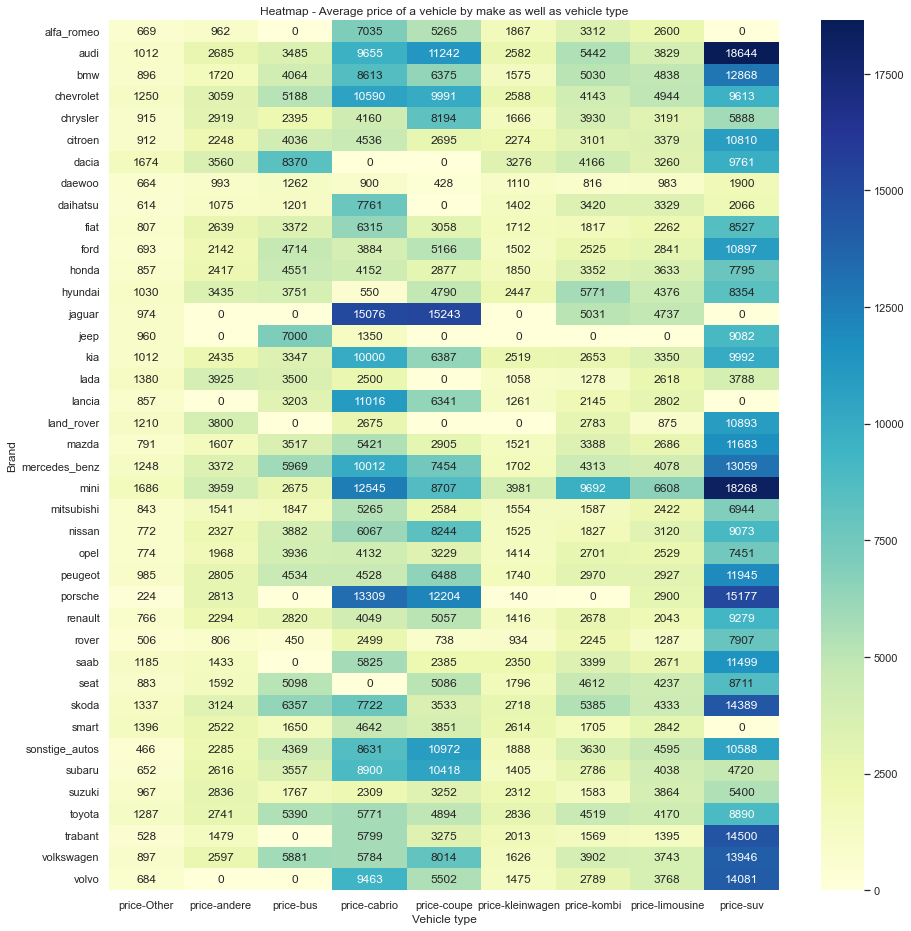

In [10]:
plt.figure(figsize=(15,16))
fig = sns.heatmap(dfmean, annot=True, cmap="YlGnBu", fmt='d')
fig.set(xlabel="Vehicle type", ylabel="Brand")
fig.set_title("Heatmap - Average price of a vehicle by make as well as vehicle type")
plt.show()